In [1]:
import numpy as np #numpy library is used to provide alot of mathematical operation 
import pandas as pd #pandas lobrary is used to load and save and manipulate and extract wonderful information from dat

In [2]:
#read the data
df=pd.read_excel("D:/Sprints/project 2/Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.info()
#the expected Dtype
#int for InvoiceNo but it is object so we need to find why
#int for StockCode but it is object so we need to find why
#object for Description
#int for Quantity
#date for InvoiceDate
#float for UnitPrice
#float for CustomerID
#object for country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


-Missing Values

In [4]:
df.isnull().sum()
#we can see here the missing values are in "Description" and "CustomerID"

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#with the "Description" column we can fill it with the value "Missed"
df["Description"].fillna("missing",inplace=True)

In [6]:
#but with the "CustomerID" we can't replace the missing value with the mean for example so we will delete the empty rows
df.dropna(inplace=True)

In [7]:
df.isnull().sum()
#now we don't have any null values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

-Outliears

In [8]:
df["Quantity"].describe()
#as we can see there are negative values meaning that there is outliears here but it is the quantity column 
#and after searching in the Domain it could be cancelled or wrong orders
#so we need to know if is outliear or the customer cancelled the order

count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [9]:
#this dataframe will carry all the negative quantity
maybeCancelledOrders=df[df["Quantity"]<0] 

In [10]:
#here we will reset the index for later use
maybeCancelledOrders.reset_index(inplace=True)
maybeCancelledOrders

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
1,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
2,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
3,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
4,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
8900,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
8901,541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
8902,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
8903,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#any negative Quantity means it may be a canceled order or it's just wrong data(outlier)
#how to know it's canceled order?
#if the item got 2 record one with positive Quantity and another record with negative Quantity
#how to know it's the same purshes and the same item ?
#we track the purchase by the invoiceDate and the invoice number and to know the item we know it by the description
#so if we got a record with the same data but one with negative Quantity and another with a positive Quantity so we will drop themm both
#after we done this we remains with the records with just negative Quantity it's just an outlier so we will drop them also

In [11]:
#this function will delete The Negative Quantity
#as if the Quantity was a outliear or a canclled order
def deleteTheNegativeQuantity(x):
    global df #we need to make it global so we can use it
    len=x.shape[0] #here we take number of rows so we loop all over the negative values
    for i in range(len):
        #for the first loop
        dayOfBought=x["InvoiceDate"][i] #the day the bought happen and it is very important
        cancelledValue=x["Quantity"][i] #take the Quantity which is negative number
        description=x["Description"][i]  #take the Description and we need it cause if the customer make another buy with the same reset so we can specifiy the row
        cancelledReset=x["InvoiceNo"][i] #take the InvoiceNo which is the maybeCancelledReset and it start with C 
        Reset=int(cancelledReset.split("C")[1]) #here we take away the C with the split fun and take the number from the list and convert it to integar 
        #now we will drop the row that have the same quantity but positive as the customer at this time was buying
        #and take the reset and the description also it is very important to take the four values as it will be the key to determine the row
        #and if is was a outliear meaning it was just a negative Quantity so we will delete it with the second line of code note here we take the quantity with the negative and take the InvoiceNo with the C
        df = df.drop(df[ (df["Quantity"]== (-cancelledValue) ) & (df["InvoiceNo"]== Reset) & (df["Description"]== description) & (df["InvoiceDate"]== dayOfBought)].index)
        df = df.drop(df[ (df["Quantity"]== cancelledValue ) & (df["InvoiceNo"]== cancelledReset) & (df["Description"]== description) & (df["InvoiceDate"]== dayOfBought)].index)
        


In [ ]:
#calling the function to delete the negative quantity
deleteTheNegativeQuantity(maybeCancelledOrders)
#now all the orders that been cancelled are deleted by taknig out all the negative and postive quantity 
#also deleted all the negative values that consider to be outliears 

In [ ]:
df["Quantity"].describe()
#as we can see the data also need to be scaled

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
#after alot of search and tries if we keep the "Country" or "Stockcode" and then do oneHot to make it numeric colums
#we will have a high dimension dataframe and later when if we scale it will make memory overflow and it will pop an error
#also if we didn't scale the data and decide that to train Kmean with this form it also will do memory overflow due to the high dimension1 which mean alot of calculations (it happened to me)
#so better here to delete the "Country" and the "StockCode"
#also if we had few country we would keep them
#now we will use another technique to categories the customers called RFM we will explain it later

In [ ]:
#now we don't need the column "Country" and "StockCode" so we will drop it
df.drop("Country",axis=1,inplace=True)
df.drop('StockCode',axis=1,inplace=True)

In [ ]:
#we can also create the total money by multiplying the column "Quantity" with "UnitPrice"
df['Total'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#now we can drop "Quantity" and "Quantity" 
df.drop('Quantity',axis=1,inplace=True)
df.drop('UnitPrice',axis=1,inplace=True)

In [ ]:
df["Total"].describe()
#we need to drop the row of zer0s

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Total, dtype: float64

In [ ]:
#deleting the zeros on the column "Total"
df.drop(df[df["Total"]==0].index, inplace = True)

In [ ]:
df["Total"].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Total, dtype: float64

In [ ]:
df

,InvoiceNo,Description,InvoiceDate,CustomerID,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,15.30
1,536365,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,2011-12-09 12:50:00,12680.0,10.20
541905,581587,CHILDREN'S APRON DOLLY GIRL,2011-12-09 12:50:00,12680.0,12.60
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,2011-12-09 12:50:00,12680.0,16.60
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,2011-12-09 12:50:00,12680.0,16.60


In [ ]:
#here to save the dataframe so i don't run the code multiple times
df.to_excel('D:/Sprints/project 2/CleanedData.xlsx',index=False)

In [9]:
df=pd.read_excel("D:/Sprints/project 2/CleanedData.xlsx")

-Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute

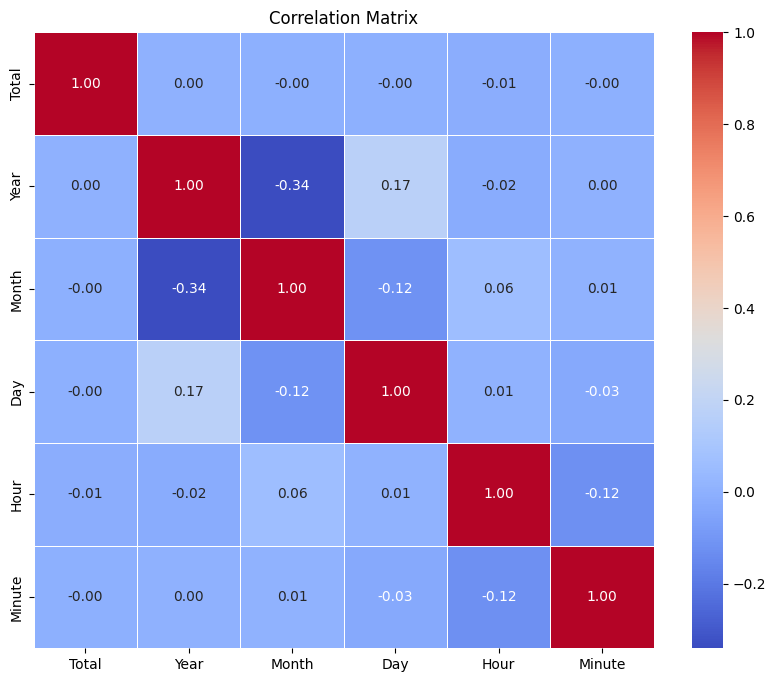

In [13]:
correlation_matrix = df[['Total', 'Year', 'Month', 'Day', 'Hour', 'Minute']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop('Year',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)
df.drop('Day',axis=1,inplace=True)
df.drop('Hour',axis=1,inplace=True)
df.drop('Minute',axis=1,inplace=True)

-Feature Extraction

In [ ]:
#Now we will use RFM stands for Recency, Frequency and Monetary Value to segment customers based on their behavior.
#Recency means how many days had passed since customer last purchased
#Frequency means how many times a customer had shopped here
#Monetary means how much money had the customer spent

In [16]:
#create features dataframe
featureDf = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days, #this to create the recency so we subtract the last time he bought from the time before this buy so we get the how many days passed since the last buy
                                            'InvoiceNo': 'count',#here we count Frequency which is the count of invoices for each customer
                                            'Total': 'sum'})#here we create monetary which is the money the customer had spent

# rename the features
featureDf.rename(columns={'InvoiceDate': 'recency', #rename InvoiceDate to recency
                            'InvoiceNo': 'frequency',#rename InvoiceNo to frequency
                            'TotalPrice': 'monetary'}, inplace=True)#rename it to monetary

In [5]:
featureDf


,recency,frequency,Total
CustomerID,,,
12346,325,1,77183.60
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40
...,...,...,...
18280,277,10,180.60
18281,180,7,80.82
18282,7,12,178.05


In [66]:
from sklearn.preprocessing import StandardScaler #import the standerscaler to scale the data to give a better result
scaler = StandardScaler()
x = scaler.fit_transform(featureDf) #scale the data

-The Model

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [25]:
Z = linkage(x, method='ward', metric='euclidean')

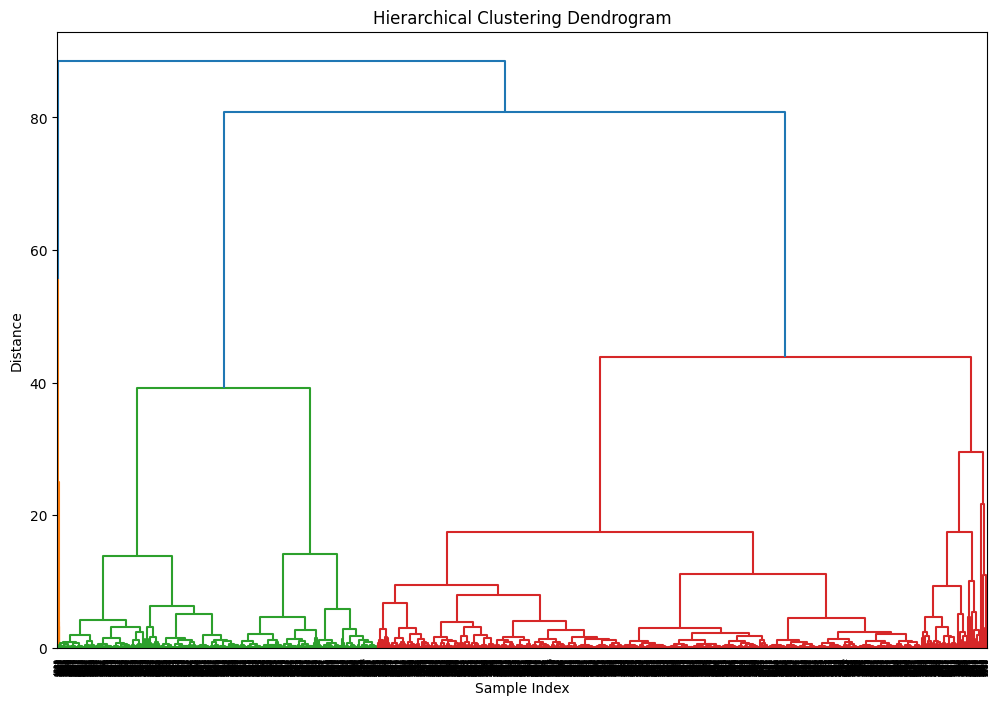

In [26]:
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
#from the plot if we take a line we can say 3 or 5 clusters can be good choice
#to make sure we will do the elbow method which we try different number of clusters and from the plot we can see what is a good number of cluters

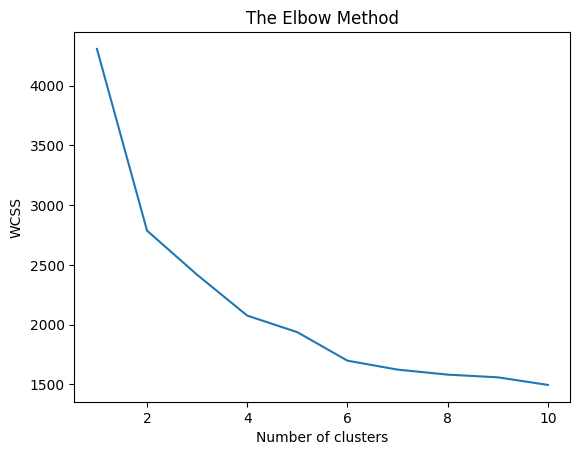

In [102]:
from sklearn_extra.cluster import KMedoids# import KMedoids to use it as our model to cluster the data
wcss = []  #WCSS is the sum of the distance between each point and the centroid in a cluster 
#to know which numberofcluster to use we will use the Elbow Method
#it work by trying differnt numberofcluster and from the plot when it change we chose that point as clusternumber 
#we will try differnt values from 1 to 10
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters = i,random_state = 42)
    kmedoids.fit(x)
    wcss.append(kmedoids.inertia_)
#here we will plot the performans K-means clustering with different numbers of clusters 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
#as we can see the numebr of cluster is between 3 and 4 so we will chose 3
kmedoids = KMedoids(n_clusters = 3,random_state = 42)
y = kmedoids.fit_predict(x)#fit and do predict to get the final results

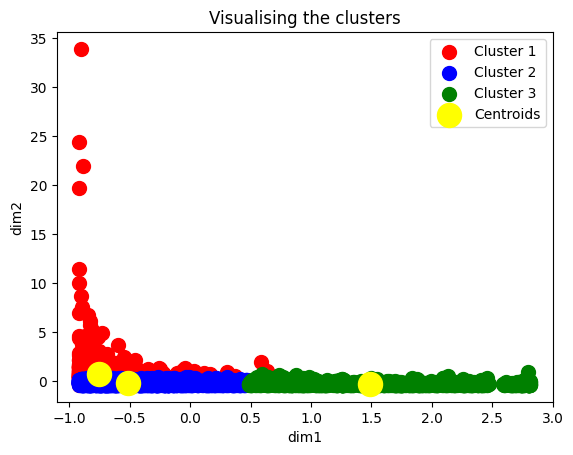

In [107]:
# Visualising the clusters
plt.scatter(x[y  == 0, 0], x[y  == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y  == 1, 0], x[y  == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y  == 2, 0], x[y  == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.title('Visualising the clusters')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.legend()
plt.show()

After evaluating the two method 
the hierarchical cluster says the best number of k is between 4 and 5
and k medoids says the best number is between 2 and 4